# $\color{Green}{\text{Fundamentals of Inference and Learning}}$ 
## Homework 1 
### Exercise 1 : Statistical Inference and Maximum Likelihood

### Part 1
First we need to compute $Z(\lambda)$ in order to have a normalized distribution. We therefore have:
$$
\int_{-\infty}^{-\infty} p_\lambda (x_i)dx_i = 1 
\Leftrightarrow \int_{1}^{20} \frac{1}{Z(\lambda)}e^{\frac{-x_i}{\lambda}}dx_i = 1
$$
By integrating:
$$
-\frac{\lambda}{Z(\lambda)}*(e^{\frac{-20}{\lambda}}-e^{\frac{-1}{\lambda}}) = 1
$$
$Z(\lambda)$ is found to be : 
$$
    Z(\lambda) = -\lambda * (e^{\frac{-20}{\lambda}}-e^{\frac{-1}{\lambda}}) \square
$$

b) Now compute $\mathbb{E}[X]$
$$
\mathbb{E}[X] = \int_{1}^{20} x_i \cdot \frac{1}{Z(\lambda)}e^{\frac{-x_i}{\lambda}}dx_i
$$
Let's integrate by parts:
$$
\mathbb{E}[X] = \frac{1}{Z(\lambda)} \{ -\lambda[20e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}}] + \lambda \int_{1}^{20} e^{\frac{-x_i}{\lambda}}dx_i\}
$$
Finally:
$$
    \mathbb{E}[X] = -\frac{1}{Z(\lambda)} \{ \lambda[20e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}}] + \lambda^2 [e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}}]\}
$$ 

Now lets compute $\partial_\lambda log Z(\lambda)$:
$$
\partial_\lambda log Z(\lambda) = \frac{1}{\lambda(e^{\frac{-20}{\lambda}}-e^{\frac{-1}{\lambda}})} [-(e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}})-\lambda(\frac{20e^{-\frac{20}{\lambda}}}{\lambda^2}-\frac{-e^{-\frac{1}{\lambda}}}{\lambda^2}] = -\frac{1}{Z(\lambda)} \{ \lambda[20e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}}] + \lambda^2 [e^{-\frac{20}{\lambda}}-e^{-\frac{1}{\lambda}}]\}
$$

By comparing the previous result found for $\mathbb{E}[X]$, the final expression is:
$$
\mathbb{E}[X] = \lambda^2 \cdot \partial_\lambda Z(\lambda) \square
$$

c) Finally let's find an expression for the variance $\mathbb{V}[X]$: \
In order to achieve this, let's express $Z(\lambda)$ and its derivative as follow:
* $Z(\lambda) = \lambda [e^{-\frac{x}{\lambda}}]^1_{20}$
* $\lambda Z'(\lambda) = Z(\lambda)+[xe^{-\frac{x}{\lambda}}]^1_{20}$
* $\lambda^4 Z''(\lambda) = \lambda[x^2e^{-\frac{x}{\lambda}}]^1_{20}$

Then:$ \mathbb{V}[X] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2 $ \
we can express the two terms as: 
* $\mathbb{E}[X^2] = \frac{1}{Z(\lambda)} \int^{20}_1 x^2 e^{\frac{-x}{\lambda}}dx = \frac{\lambda^4Z''(\lambda)}{Z(\lambda)} + 2\lambda^3 \frac{Z'(\lambda)}{Z(\lambda)}$
* $\mathbb{E}[X]^2 =  (\lambda^2\frac{Z'(\lambda)}{Z(\lambda)})^2 = \lambda^4 \frac{Z'(\lambda)Z'(\lambda)}{Z(\lambda)^2}$
Then one can derive the final expression for the variance:
$$
\mathbb{V}[X] = \frac { \lambda ^ { 4 } Z ^ { \prime \prime } ( \lambda ) } { Z ( \lambda ) } + 2 \lambda ^ { 3 } \frac { Z ^ { \prime } ( \lambda ) } { Z ( \lambda ) } - \lambda ^ { 4 }  \frac { Z ^ { \prime } ( \lambda )  Z ^ { \prime } ( \lambda ) } { Z ( \lambda ) ^ { 2 } }
= 2 \lambda ^ { 3 } \frac { Z ^ { \prime } ( \lambda ) } { Z ( \lambda ) } + \lambda ^ { 4 } \frac { Z ^ { \prime \prime } ( \lambda ) Z ( \lambda ) - Z ^ { \prime } ( \lambda ) Z ^ { \prime } ( \lambda ) } { Z ( \lambda )}
= \frac { \partial } { \partial \lambda } ( \lambda ^ { 4 } \frac { Z ^ { \prime } ( \lambda ) } { Z ( \lambda )} ) = \frac { \partial } { \partial \lambda } ( \lambda ^ { 2 } \mathbb{E}[X] ) \square
$$

### part 2

$$ 
p_\lambda(\{x_i\}^n_{i = 1}) = \prod_{i = 1}^n p_\lambda(x_i) = \prod_{i = 1}^n \frac{1}{Z(\lambda)}e^{-\frac{x_i}{\lambda}} $$ 

$$ log(p_\lambda(\{x_i\}^n_{i = 1})) 
= \sum _ { i = 1 } ^ { n } \frac { x _ { i } } { \lambda } - \log [ - \lambda ( e ^ { - 20  \lambda } - e ^ { - 1 / \lambda } ) ]
$$
Then 
$$
\mathcal{L}_\lambda(\{x_i\}^n_{i = 1}) = \frac{1}{n} log(p_\lambda(\{x_i\}^n_{i = 1})) 
= - \log [ - \lambda ( e ^ { - 20  \lambda } - e ^ { - 1 / \lambda } ) ] - \frac{1}{n\lambda} \sum_{i = 1}^n x_i \square
$$

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [98]:
exp = np.exp
exponential = np.random.exponential

In [99]:
def variance(x):
    numerator = (x**2 + exp(38/x) * x**2 - exp(19/x) * (361 + 2 * x**2))
    denominator = (-1 + exp(19/x))**2
    result = numerator / denominator
    return result

/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/692656655.py:2: RuntimeWarning: overflow encountered in exp
  numerator = (x**2 + exp(38/x) * x**2 - exp(19/x) * (361 + 2 * x**2))
/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/692656655.py:3: RuntimeWarning: overflow encountered in square
  denominator = (-1 + exp(19/x))**2
/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/692656655.py:4: RuntimeWarning: invalid value encountered in divide
  result = numerator / denominator


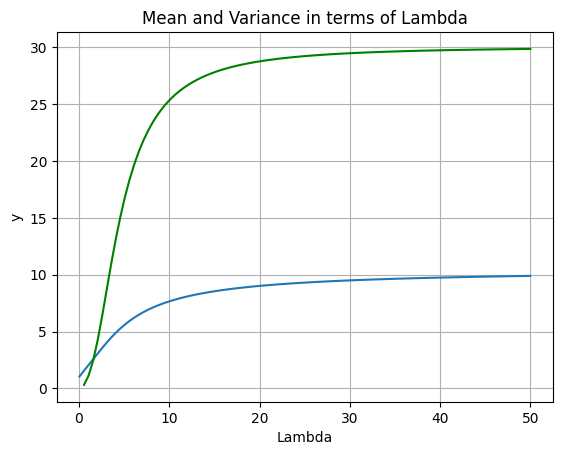

In [100]:
import math
import numpy as np
import matplotlib.pyplot as plt
lambda_values = np.linspace(0.05, 50, 100)
# Define the function z(lambda)
z = lambda_values * (exp(-1 / lambda_values) - exp(-20 / lambda_values))
mean = lambda_values / z * (z-(20 * exp(-20 / lambda_values) - exp(-1 / lambda_values)))
var = variance(lambda_values)
# Plot the results
plt.plot(lambda_values, mean)
plt.plot(lambda_values, var, color='g')
plt.xlabel('Lambda')
plt.ylabel('y')
plt.title('Mean and Variance in terms of Lambda')
plt.grid(True)
plt.show();


3.

In [101]:
def log_likelihood(lambda_, obs):
    log_likelihood_value = -np.log(-lambda_ * (np.exp(-20 / lambda_) - np.exp(-1 / lambda_)))
    log_likelihood_value = log_likelihood_value - np.sum(obs) / (len(obs)*lambda_)
    return log_likelihood_value

In [116]:
def create_pdf(N, lambda_, seed = True):
    if seed:
        np.random.seed(13092001)
    obs = np.random.exponential(scale=lambda_, size=20000)
    obs = obs[obs <20]
    obs = obs[obs > 1]
    obs = obs[:N]
    return obs

In [117]:
def minimizer_lambda(func, obs):
    return minimize(lambda lbda: -func(lbda,obs),np.random.uniform(0.05,50), method = 'Nelder-Mead').x

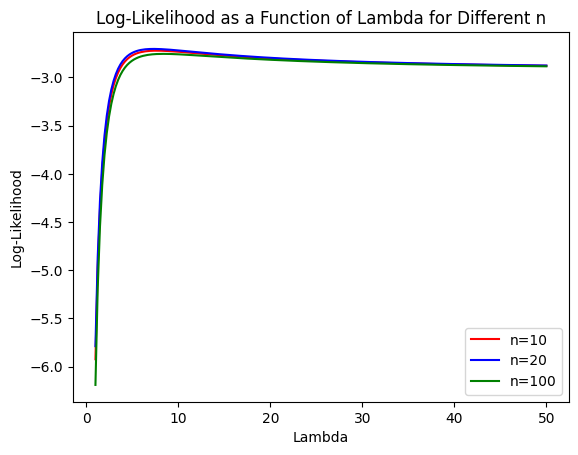

In [118]:
#parameters
lambda_ = 10
lambda_bounds = [(0.05,50)]
n_samples = [10,20,100]
tab_lambda = np.linspace(1,50,200)
color = ['r','b','g','y']
for index, N in enumerate(n_samples):
    obs = create_pdf(N, lambda_)
    LL_func = np.array([log_likelihood(lbd, obs) for lbd in tab_lambda])
    plt.plot(tab_lambda,LL_func, color=color[index],label=f'n={N}')

plt.xlabel('Lambda')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood as a Function of Lambda for Different n')
plt.legend()
plt.show()

4.

In [120]:
def plot_ll(lambda_star):
    tab_N = [10, 100,1000]
    lambda_ = lambda_star
    lambda_values = np.linspace(0.05, 50, 200)
    for N in tab_N:
        plt.figure(figsize=(5,5))
        plt.title(f'Log-Likelihood for $\lambda = {lambda_}$ and n = {N}')
        obs = create_pdf(N,lambda_)
        y = np.array([log_likelihood(iter_lbd, obs) for iter_lbd in lambda_values])
        lambda_est = minimizer_lambda(log_likelihood,obs)
        plt.plot(lambda_values, y )
        plt.axvline(lambda_est, label = r'$\lambda_{ML}$', color = 'k')
        plt.axvline(lambda_, label = r'$\lambda_{True}$', color = 'r')
        plt.legend()
        plt.plot()

/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/1351814390.py:2: RuntimeWarning: overflow encountered in exp
  log_likelihood_value = -np.log(-lambda_ * (np.exp(-20 / lambda_) - np.exp(-1 / lambda_)))
/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/1351814390.py:2: RuntimeWarning: invalid value encountered in subtract
  log_likelihood_value = -np.log(-lambda_ * (np.exp(-20 / lambda_) - np.exp(-1 / lambda_)))
/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/1351814390.py:2: RuntimeWarning: invalid value encountered in log
  log_likelihood_value = -np.log(-lambda_ * (np.exp(-20 / lambda_) - np.exp(-1 / lambda_)))


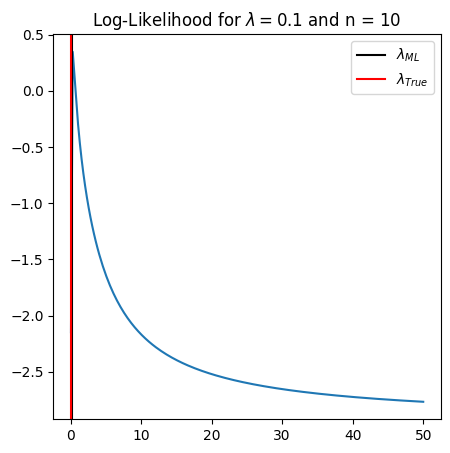

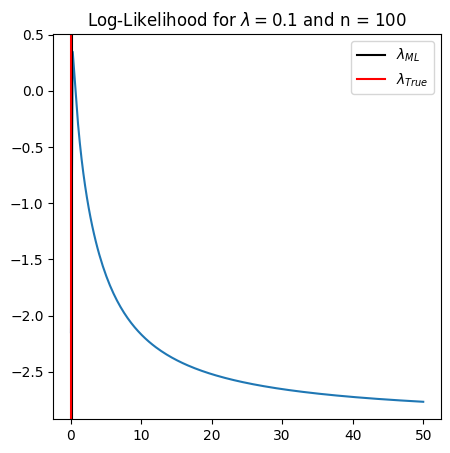

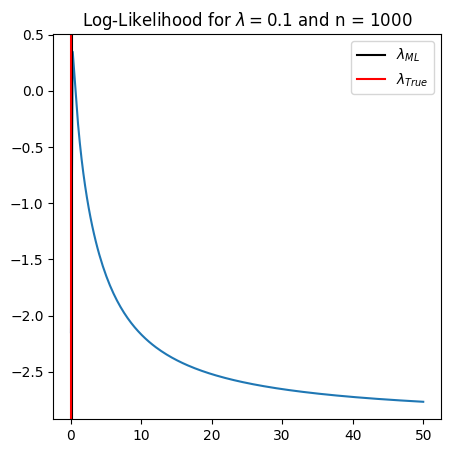

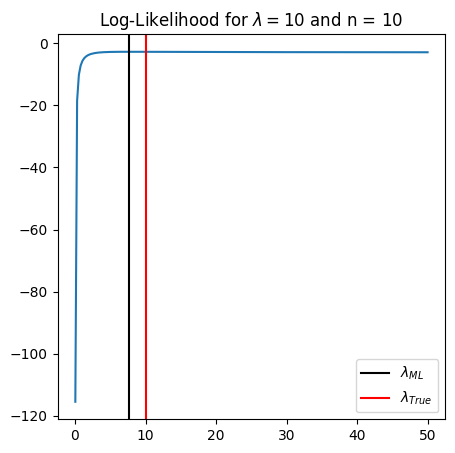

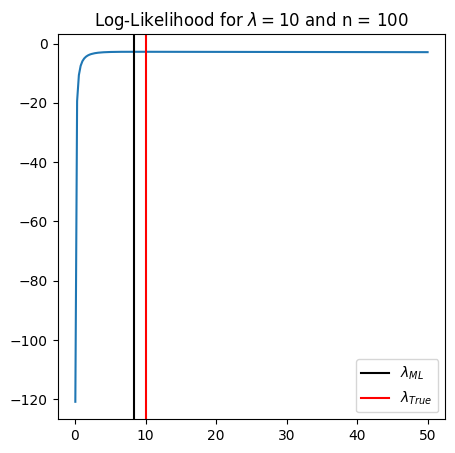

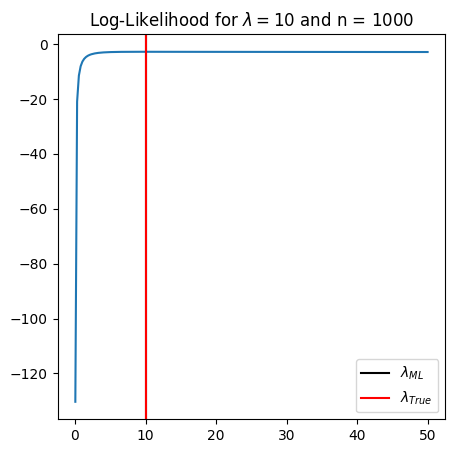

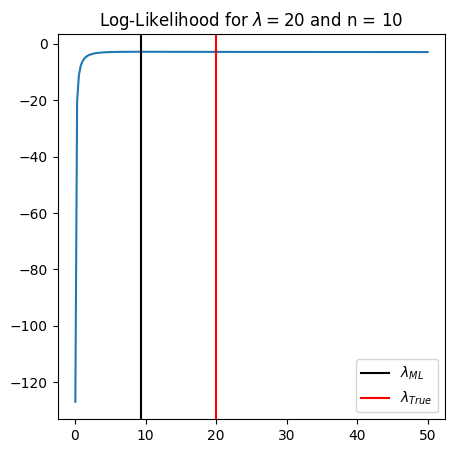

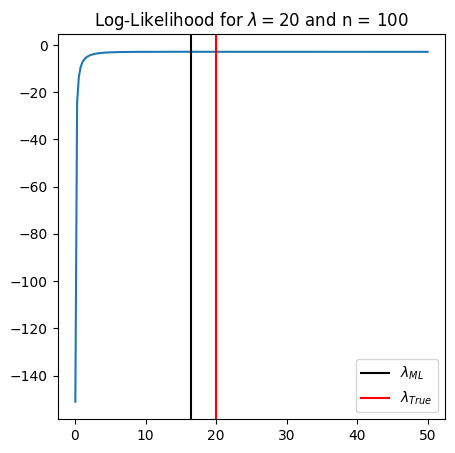

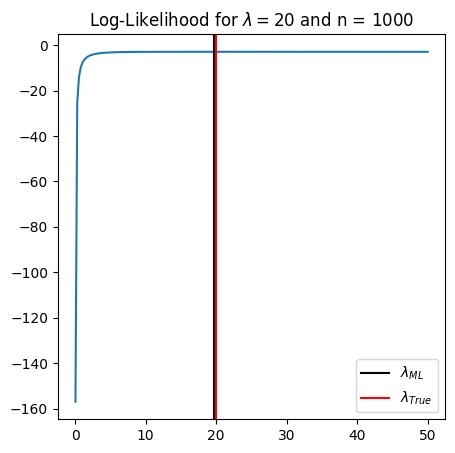

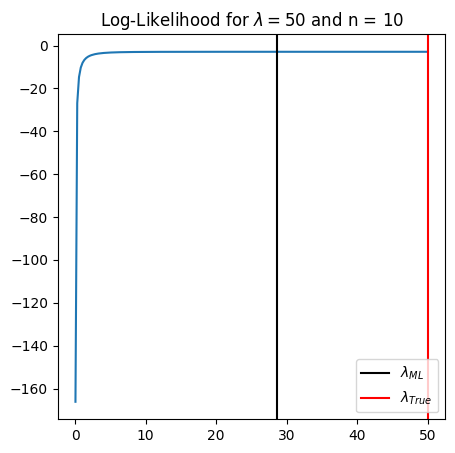

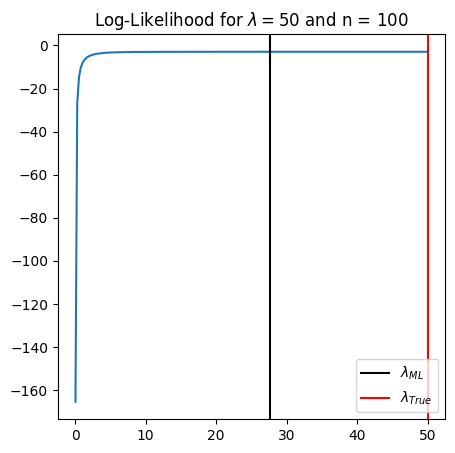

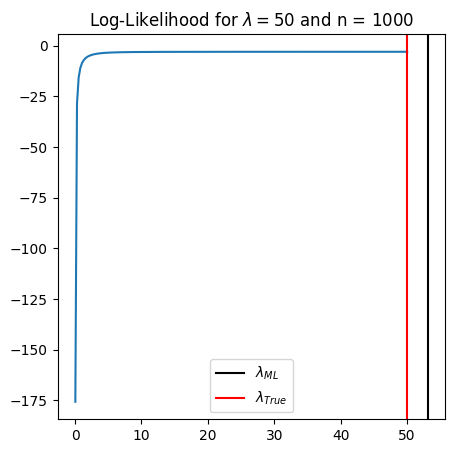

In [121]:
plot_ll(lambda_star=0.1)
plot_ll(lambda_star=10)
plot_ll(lambda_star=20)
plot_ll(lambda_star=50)

/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/1351814390.py:3: RuntimeWarning: invalid value encountered in divide
  log_likelihood_value = log_likelihood_value - np.sum(obs) / (len(obs)*lambda_)
/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/1351814390.py:2: RuntimeWarning: overflow encountered in exp
  log_likelihood_value = -np.log(-lambda_ * (np.exp(-20 / lambda_) - np.exp(-1 / lambda_)))
/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/1351814390.py:2: RuntimeWarning: invalid value encountered in subtract
  log_likelihood_value = -np.log(-lambda_ * (np.exp(-20 / lambda_) - np.exp(-1 / lambda_)))
/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/1351814390.py:2: RuntimeWarning: invalid value encountered in log
  log_likelihood_value = -np.log(-lambda_ * (np.exp(-20 / lambda_) - np.exp(-1 / lambda_)))


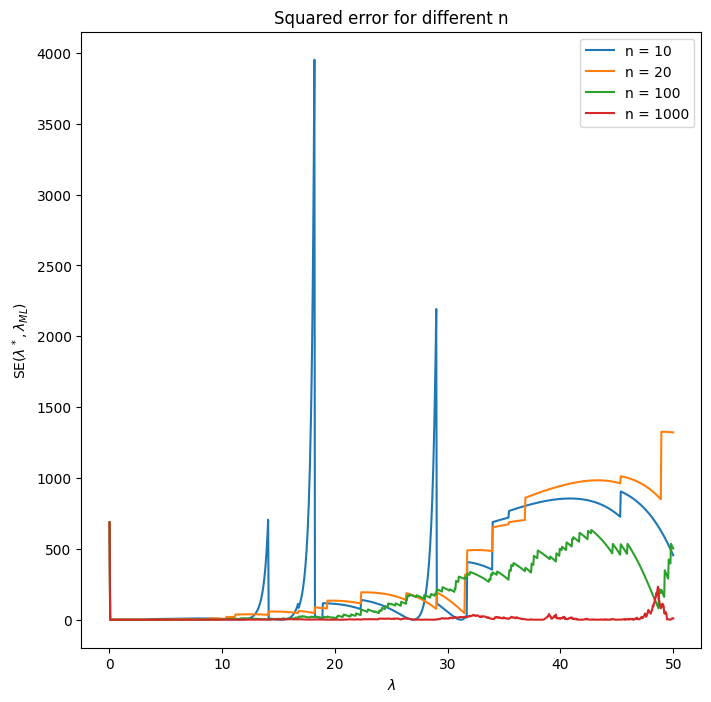

In [122]:
tab_lambda = np.linspace(0.05,50,1000)
tab_N = [10,20,100,1000]
plt.figure(figsize=(8,8))
plt.title('Squared error for different n')
plt.xlabel('$\lambda$')
plt.ylabel('SE($\lambda^*,\lambda_{ML}$)')
for N in tab_N:
    se_list = []
    for lbda in tab_lambda:
        obs = create_pdf(N, lbda)
        lambda_est = minimizer_lambda(log_likelihood, obs)
        se = (lambda_est - lbda)**2
        se_list.append(se)
    plt.plot(tab_lambda,se_list, label=f'n = {N}')
plt.legend()
plt.show()

From this plot, it can be shown that the squared error decreases as the number of samples N increases. It can be explained as the density becomes more and more accurate. For values such as n = 10, the pdf is not very accurate, especially for low value of $\lambda$. Furthermore, the error is increases in the same way as $\lambda$ does.

5. 

In [108]:
def jeffrey_prior(lambda_):
    return np.sqrt(variance(lambda_))/lambda_**2
def compute_map(lambda_, obs):
    return log_likelihood(lambda_, obs) + jeffrey_prior(lambda_)

In [123]:
def plot_map(lambda_star):
    tab_N = [10, 100,1000]
    lambda_ = lambda_star
    lambda_values = np.linspace(0.05, 50, 200)
    for N in tab_N:
        plt.figure(figsize=(5,5))
        plt.title(f'Log-Likelihood for $\lambda = {lambda_}$ and n = {N}')
        obs = create_pdf(N,lambda_)
        y = np.array([compute_map(iter_lbd, obs) for iter_lbd in lambda_values])
        lambda_est = minimizer_lambda(compute_map, obs)
        plt.plot(lambda_values, y )
        plt.axvline(lambda_est, label = r'$\lambda_{ML}$', color = 'k')
        plt.axvline(lambda_, label = r'$\lambda_{True}$', color = 'r')
        plt.legend()
        plt.plot()

/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/692656655.py:2: RuntimeWarning: overflow encountered in exp
  numerator = (x**2 + exp(38/x) * x**2 - exp(19/x) * (361 + 2 * x**2))
/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/692656655.py:3: RuntimeWarning: overflow encountered in double_scalars
  denominator = (-1 + exp(19/x))**2
/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/692656655.py:4: RuntimeWarning: invalid value encountered in double_scalars
  result = numerator / denominator
/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/1351814390.py:2: RuntimeWarning: invalid value encountered in subtract
  log_likelihood_value = -np.log(-lambda_ * (np.exp(-20 / lambda_) - np.exp(-1 / lambda_)))
/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/1351814390.py:2: RuntimeWarning: invalid value encountered in log
  log_likelihood_value = -np.log(-lambda_ * (np.exp(-20 / lambda_) - np.exp(-1 / lambda_)))
/var/folde

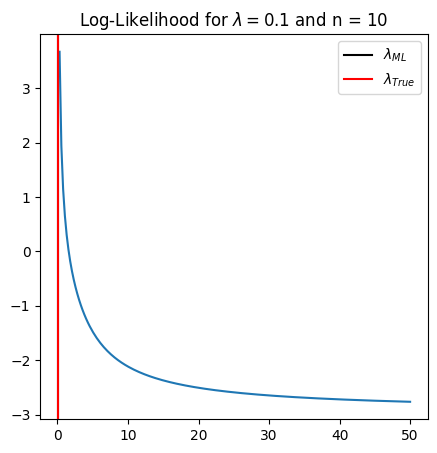

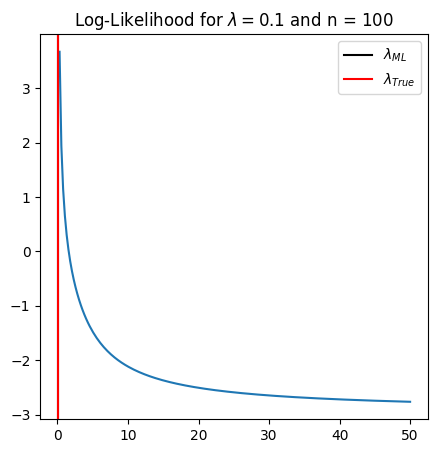

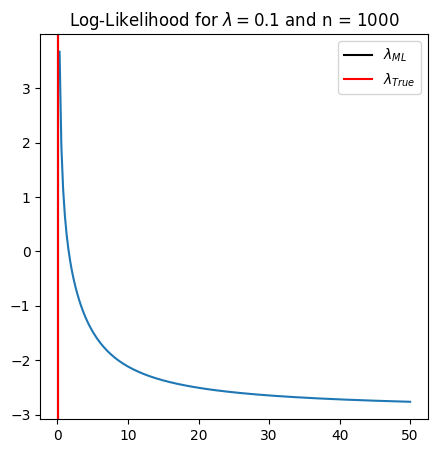

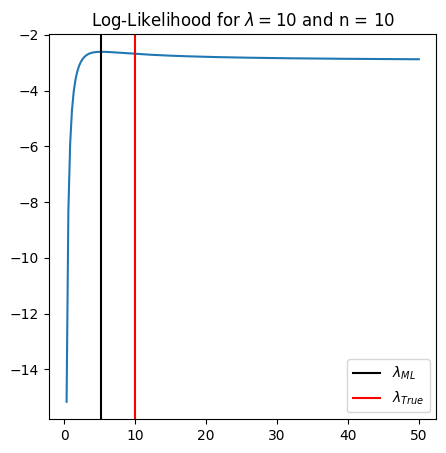

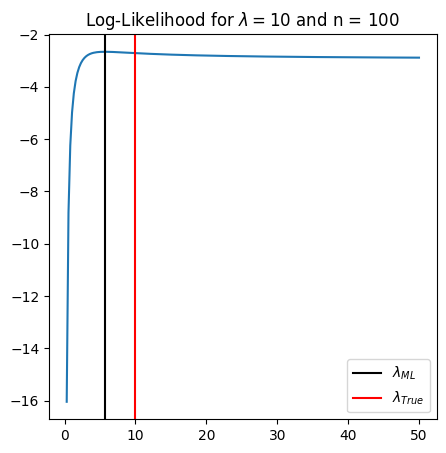

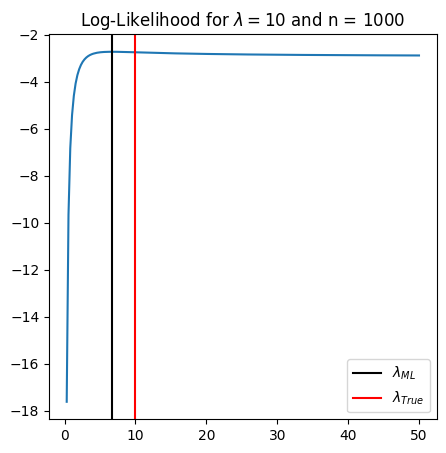

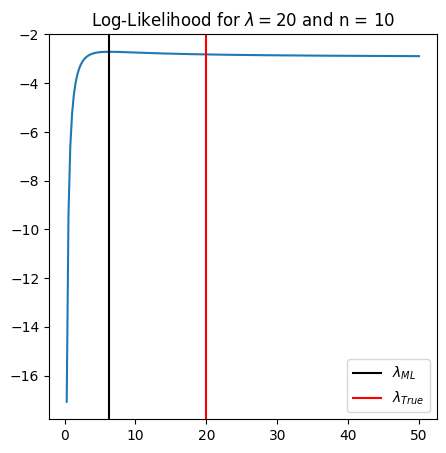

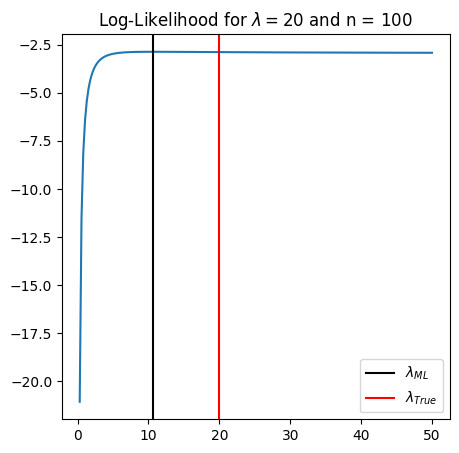

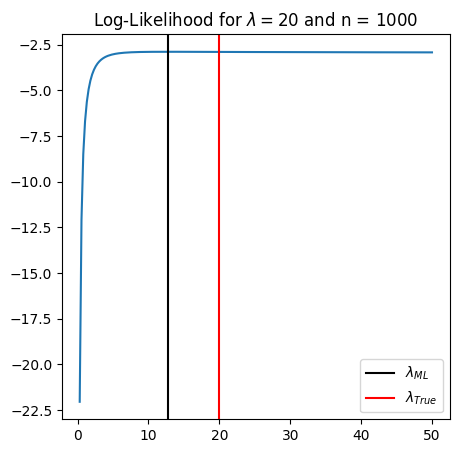

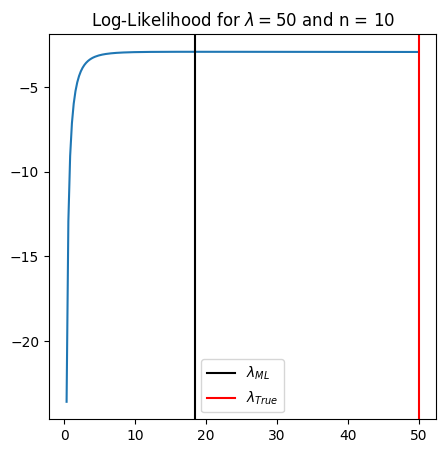

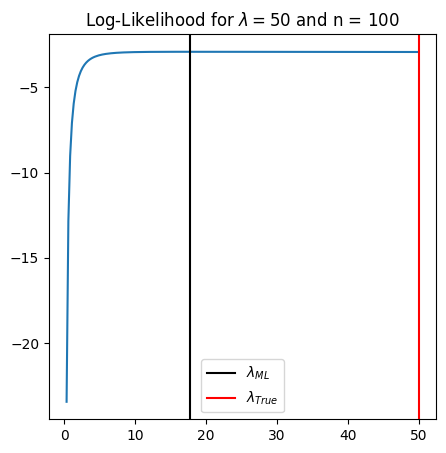

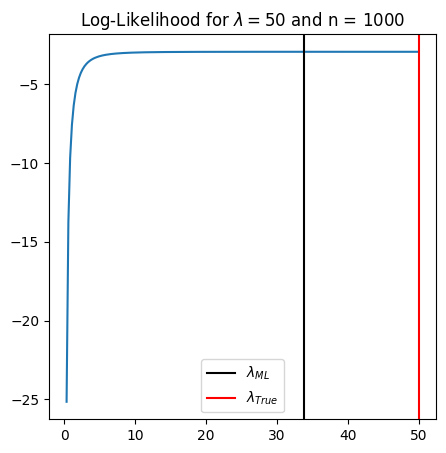

In [124]:
plot_map(lambda_star=0.1)
plot_map(lambda_star=10)
plot_map(lambda_star=20)
plot_map(lambda_star=50)

6. 

In [125]:
from numpy import percentile
from numpy.random import choice

def MSE_est(lambda_true,lambda_est):
  N_boot = 100
  MSE = (lambda_est - np.full(len(lambda_est), lambda_true))**2
  MSE_mean = MSE.mean()
  MSE_boot = choice(MSE,(N_boot,len(lambda_est)))
  MSE_boot_mean = MSE_boot.mean(axis=1)
  CI_min = percentile(MSE_boot_mean, [2.5,97.5])[0]
  CI_max = percentile(MSE_boot_mean, [2.5,97.5])[1]

  return MSE_mean, CI_min, CI_max

/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/692656655.py:2: RuntimeWarning: overflow encountered in exp
  numerator = (x**2 + exp(38/x) * x**2 - exp(19/x) * (361 + 2 * x**2))
/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/692656655.py:3: RuntimeWarning: overflow encountered in double_scalars
  denominator = (-1 + exp(19/x))**2
/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/692656655.py:4: RuntimeWarning: invalid value encountered in double_scalars
  result = numerator / denominator
/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/1351814390.py:3: RuntimeWarning: invalid value encountered in divide
  log_likelihood_value = log_likelihood_value - np.sum(obs) / (len(obs)*lambda_)
/var/folders/jf/sxgjcs2s1p3_ltpz295jggpm0000gn/T/ipykernel_2528/1351814390.py:2: RuntimeWarning: divide by zero encountered in divide
  log_likelihood_value = -np.log(-lambda_ * (np.exp(-20 / lambda_) - np.exp(-1 / lambda_)))
/var/folders/jf/sxg

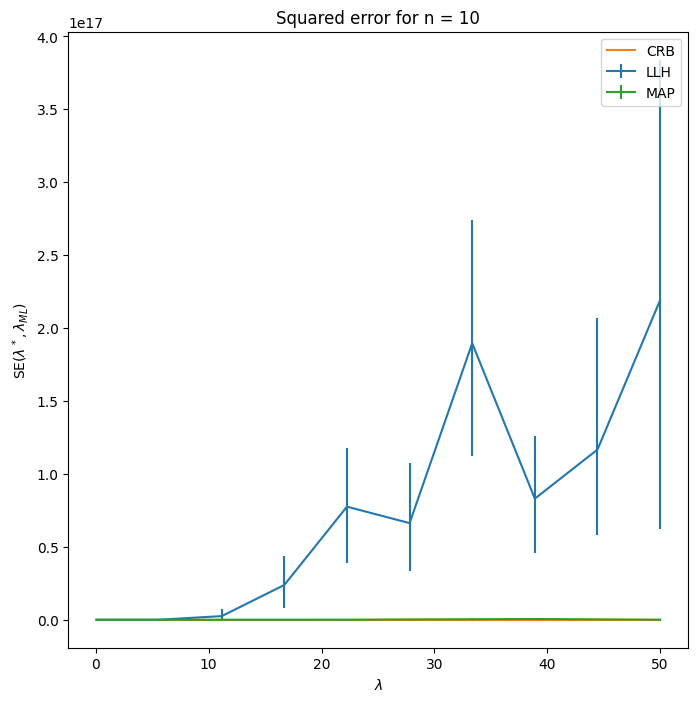

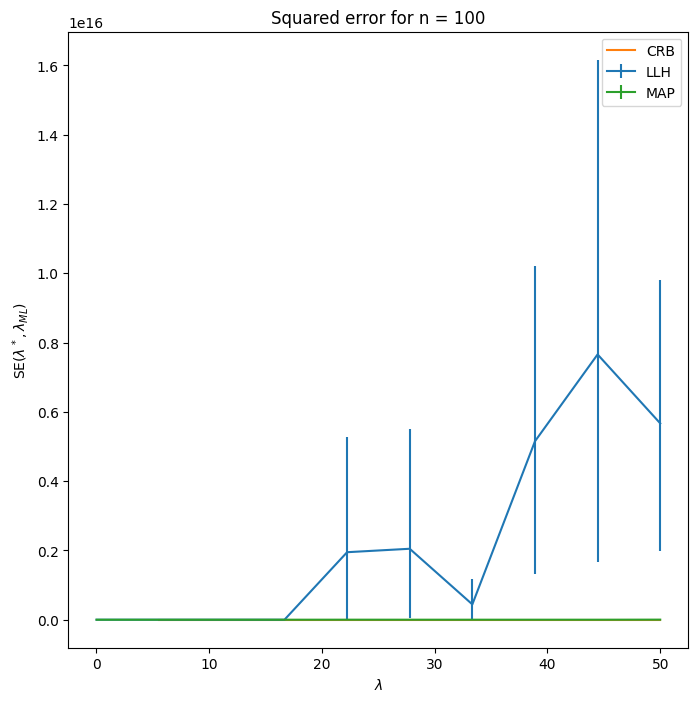

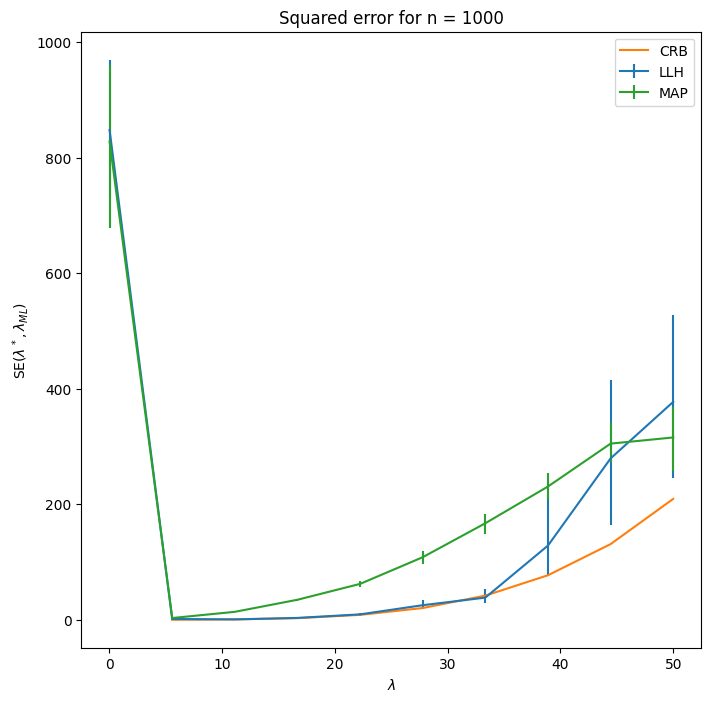

In [126]:
tab_lambda = np.linspace(0.05,50,10)
tab_N = [10,100,1000]
N_rep = 100

N_CI_min_LLH = []
N_CI_max_LLH = []
N_MSE_LLH = []

N_CI_min_MAP = []
N_CI_max_MAP = []
N_MSE_MAP = []

CRB = []

for n in tab_N:
    CI_min_LLH = []
    CI_max_LLH = []
    SE_LLH = []

    CI_min_MAP = []
    CI_max_MAP = []
    SE_MAP = []
    crb = []
    for lbda in tab_lambda:
        i = 0
        MAP_temp = []
        LLH_temp = []
        crb_value = 1 / (n*variance(lbda)/lbda**4)
        crb.append(crb_value)
        while i < N_rep:
            obs = create_pdf(n, lbda, seed=False)
            LLH_temp.append(minimizer_lambda(log_likelihood, obs)[0])
            MAP_temp.append(minimizer_lambda(compute_map,obs)[0])
            i += 1
        SE_LLH_tmp, CI_min_LLH_tmp, CI_max_LLH_tmp = MSE_est(lbda, LLH_temp)
        SE_MAP_tmp, CI_min_MAP_tmp, CI_max_MAP_tmp = MSE_est(lbda,MAP_temp)

        SE_LLH.append(SE_LLH_tmp)
        CI_min_LLH.append(CI_min_LLH_tmp)
        CI_max_LLH.append(CI_max_LLH_tmp)

        SE_MAP.append(SE_MAP_tmp)
        CI_min_MAP.append(CI_min_MAP_tmp)
        CI_max_MAP.append(CI_max_MAP_tmp)

    N_CI_min_LLH.append(CI_min_LLH)
    N_CI_max_LLH.append(CI_max_LLH)
    N_MSE_LLH.append(SE_LLH)

    N_CI_min_MAP.append(CI_min_MAP)
    N_CI_max_MAP.append(CI_max_MAP)
    N_MSE_MAP.append(SE_MAP)

    CRB.append(crb)

N_CI_min_LLH = np.array(N_CI_min_LLH)
N_CI_max_LLH = np.array(N_CI_max_LLH)
N_MSE_LLH = np.array(N_MSE_LLH)

N_CI_min_MAP = np.array(N_CI_min_MAP)
N_CI_max_MAP = np.array(N_CI_max_MAP)
N_MSE_MAP = np.array(N_MSE_MAP)

for i, n in enumerate(tab_N):
    plt.figure(figsize=(8,8))
    plt.title(f'Squared error for n = {n}')
    plt.xlabel('$\lambda$')
    plt.ylabel('SE($\lambda^*,\lambda_{ML}$)')
    plt.errorbar(tab_lambda,N_MSE_LLH[i], yerr=[N_MSE_LLH[i]-N_CI_min_LLH[i], N_CI_max_LLH[i]-N_MSE_LLH[i]],marker="", label=f'LLH')
    plt.plot(tab_lambda, CRB[i], label = 'CRB')
    plt.errorbar(tab_lambda,N_MSE_MAP[i], yerr=[N_MSE_MAP[i]-N_CI_min_MAP[i], N_CI_max_MAP[i]-N_MSE_MAP[i]],marker="", label = f'MAP')
    plt.legend()
    plt.show()

### Exercise 2 Probability bounds and a pooling problem
1.

Starting from the definition
$$
P ( \frac { 1 } { m } \sum _ { i } z _ { i } \geq p + \varepsilon ) \leq e ^ { - 2 m \varepsilon ^ { 2 } } 
\Leftrightarrow P ( \sum _ { i } z _ { i } \geq m ( p + s ) ) \leq e ^ { - 2 m \varepsilon ^ { 2 } } 
$$
Using the hint given in the problem set:
$$
P ( e^{\lambda \sum _ { i } z _ { i }} \geq e^{\lambda m ( p + \varepsilon ) }) \leq e ^ { - 2 m \varepsilon ^ { 2 } } 
$$
Now let's apply Markov's inequality to the previous equation:
$$
P ( e^{\lambda\sum _ { i } z _ { i }} \geq e^{\lambda m ( p + \varepsilon ) }) \leq \frac{\mathbb{E}[e^{\lambda\sum _ { i } z _ { i }}]}{e^{\lambda m ( p + \varepsilon )}} = \frac{\prod _ { i }\mathbb{E}[e^{\lambda z _ { i }}]}{e^{\lambda m ( p + \varepsilon )}}
$$
For a Bernoulli variable:
$$
\mathbb{E}[e^{\lambda z _ { i }}] = \sum _ { i } e ^ { \lambda z ^ { i } } p ( Z = z _ { i } ) = e ^ { 0 } \cdot ( 1 - p ) + e ^ { \lambda } p = p e ^ { \lambda } + ( 1 - p )
$$
Finally:
$$
P ( e^{\lambda\sum _ { i } z _ { i }} \geq e^{\lambda m ( p + \varepsilon ) }) \leq \left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m \square
$$

3.
We have to differentiate $ log \left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m $ over $\lambda$ and solve $ \frac{\partial}{\partial\lambda} log \left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m = 0$ :

$$
\frac{\partial}{\partial\lambda} log \left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m = 
m \left( \frac{p e^\lambda}{pe^\lambda + (1-p)} - \frac{(p+\varepsilon)e^{\lambda(p+\varepsilon)}}{e^{\lambda(p+\varepsilon)}}\right) = 0$$
$$
\Leftrightarrow e^\lambda = \frac{(1-p)(p+\varepsilon)}{p(1-(p+\varepsilon))}
$$

Now let's rewrite $\left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m = e^{-mf(p,\varepsilon)}$ to find the value of $f(p, \varepsilon)$:

$$
log \left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right) = -f(p,\varepsilon) \\
\Leftrightarrow f(p,\varepsilon) = -log\left(\frac{(1-p)(p+\varepsilon)}{1-(p+\varepsilon)}+(1-p)\right) + (p+\varepsilon)log\left(\frac{(1-p)(p+\varepsilon)}{1-(p+\varepsilon)}\right) \\
\Leftrightarrow f(p,\varepsilon) = (p+\varepsilon)log\left( \frac{p+\varepsilon}{p}\right) + (1-(p+\varepsilon))log(\frac{1-p+\varepsilon}{1-p}) \enspace\square
$$

3. 
a)
$$
f ( p , \varepsilon = 0 ) = p \log(\frac{p}{p} ) + ( 1 - p ) \log ( \frac { 1 - p } { 1 - p } ) = 0 \enspace\square
$$
b) 
$$
\frac { \partial f ( p , \varepsilon ) } { \partial \varepsilon} \Bigr|_{\varepsilon = 0} = \log ( \frac { p + \varepsilon } { p } ) + ( p + \varepsilon ) \cdot \frac { 1 } { p + \varepsilon } - \log ( \frac { 1 - ( p + \varepsilon ) } { 1 - p } ) - ( 1 - ( p + \varepsilon ) ) \frac { 1 } { 1 - ( p + \varepsilon ) } \Bigr|_{\varepsilon = 0} = \log ( \frac { p } { p } ) + 1 - \log ( \frac { 1 - p } { 1 - p } ) - 1 = 0 + 1 - 0 - 1 = 0 \enspace\square
$$
c)
$$
\frac { \partial ^ { \varepsilon} f ( p , \varepsilon ) } { d \varepsilon ^ { 2 } } = \frac { \partial } { \partial \varepsilon } \frac { \partial f ( p , \varepsilon ) } { \partial \varepsilon} = \frac { 1 } { p + \varepsilon } + \frac { 1 } { 1 - ( p + \varepsilon ) } = \frac { 1 } { ( p + \varepsilon ) ( 1 - ( p + \varepsilon ) ) } = \frac { 1 } {- ( p + \varepsilon ) ^ { 2 } + ( p + \varepsilon) } \enspace\square
$$

By analizing the polynôme $- ( p + \varepsilon ) ^ { 2 } + ( p + \varepsilon) $, one can see that it achieves a global maximum for $p + \varepsilon = \frac{1}{2}$ in the interval [0,1] which leads to a minimum value of 4 for the function $\frac { 1 } {- ( p + \varepsilon ) ^ { 2 } + ( p + \varepsilon) }$.
We finally get:
$$
\frac { \partial ^ { \varepsilon} f ( p , \varepsilon ) } { d \varepsilon ^ { 2 } } = \frac { 1 } {- ( p + \varepsilon ) ^ { 2 } + ( p + \varepsilon) } \geq 4,  \forall \varepsilon : 0\leq p+\varepsilon\leq 1 \enspace\square
$$

4.
$$
f(p, \varepsilon) = f(p, 0) + \varepsilon f'(p, 0) + \frac{\varepsilon^2 f''(p, \tilde{\varepsilon})}{2} = \frac{\varepsilon^2 f''(p, \tilde{\varepsilon})}{2}
$$
as $ f(p, 0) = \varepsilon f'(p, 0) = 0 $ from exercise 2.3. \
Using now the last result from 2.3 one obtain that : $f(p, \varepsilon) = \frac{\varepsilon^2 f''(p, \tilde{\varepsilon})}{2} \geq 2\varepsilon^2$
\ By combining this result with  $\left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m = e^{-mf(p,\varepsilon)}$ we get:
$$
\left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m \leq e^{-2m\varepsilon^2}
$$
Which finally prove the inequality:
$$
P ( \frac{1}{m}\sum _ { i } z _ { i } \geq ( p + \varepsilon ) ) \leq \left(\frac{p e ^ { \lambda } + ( 1 - p )}{e^{\lambda ( p + \varepsilon )}}\right)^m \leq e^{-2m\varepsilon^2} \square
$$

Bonus 2. \
$P ( |\frac{1}{m}\sum _ { i } z _ { i }-p| \geq \varepsilon ) =  P ( \frac{1}{m}\sum _ { i } z _ { i }-p \geq \varepsilon , \frac{1}{m}\sum _ { i } z _ { i }-p \leq \varepsilon) = 2P ( \frac{1}{m}\sum _ { i } z _ { i } \geq ( p + \varepsilon ) ) =  2e^{-2m\varepsilon^2} \square$

5. 
We can use the probability given in the bonus: $P ( |\frac{1}{m}\sum _ { i } z _ { i }-p| \geq \varepsilon ) \leq 2e^{-2m\varepsilon^2}$ \
and compute with the given values:
* $\varepsilon = 0.01 $
* $ 2e^{-2m\varepsilon^2} = 1-0.95 = 0.05$, as we want the probability to be inside the confidence intervall to be 95%. \
We can the solve for m:
$$
2e^{-2m\varepsilon^2} = 0.05 \Leftrightarrow m = -\frac{log(\frac{0.05}{2})}{2\cdot 0.01^2} = 18'444.40
$$
We have to interrogate at least 18'445 people to be sure to be in the confidence interval.

6. 
a)

In [113]:
from scipy.stats import bernoulli
def vote(m, p):
    return bernoulli.rvs(p, size=m)

In [114]:
m_star = 18445
p_tab = [0.2,0.5,0.8]
n_rep = 1000
for p in p_tab:
    p_inside = 0
    for i in range(n_rep):
        poll = vote(m_star,p)
        p_est = np.mean(poll)
        if(abs(p_est-p) <= 0.01):
            p_inside += 1
    p_inside = p_inside / n_rep
    print(rf'for a value p={p}, the probability that p is correct within 1% is {p_inside*100}% ')

for a value p=0.2, the probability that p is correct within 1% is 100.0% 
for a value p=0.5, the probability that p is correct within 1% is 99.4% 
for a value p=0.8, the probability that p is correct within 1% is 99.9% 


b)

It seems that the harder value to determine is for p =0.5 \
Furthermore, one can observe that this bound grossly overestimates the needed number. The number $m^* = 188445$ was set to be inside the confidence interval 95% of the time. However, from the results found above, it can be seen that, for the worst case, we are inside the confidence interval 99.8% of the time, which is significantly higher than what the bound suggests.

c)

In [115]:
m_tab = np.linspace(100,15000,10,dtype=int)
p_tab = [0.2,0.5,0.8]
n_rep = 1000
for p in p_tab:
    for m in m_tab:
        for i in range(n_rep):
            poll = vote(m,p)
            p_est = np.mean(poll)
            if(abs(p_est-p) <= 0.01):
                p_inside += 1
        p_inside = p_inside / n_rep
        print(rf'for p={p} and m = {m}, the probability that p is correct within 1% is {p_inside*100}% ')

for p=0.2 and m = 100, the probability that p is correct within 1% is 19.7999% 
for p=0.2 and m = 1755, the probability that p is correct within 1% is 68.7197999% 
for p=0.2 and m = 3411, the probability that p is correct within 1% is 84.16871979989999% 
for p=0.2 and m = 5066, the probability that p is correct within 1% is 92.8841687197999% 
for p=0.2 and m = 6722, the probability that p is correct within 1% is 96.39288416871979% 
for p=0.2 and m = 8377, the probability that p is correct within 1% is 97.89639288416872% 
for p=0.2 and m = 10033, the probability that p is correct within 1% is 98.49789639288417% 
for p=0.2 and m = 11688, the probability that p is correct within 1% is 99.19849789639288% 
for p=0.2 and m = 13344, the probability that p is correct within 1% is 99.69919849789639% 
for p=0.2 and m = 15000, the probability that p is correct within 1% is 99.8996991984979% 
for p=0.5 and m = 100, the probability that p is correct within 1% is 9.399899699198498% 
for p=0.5 and m 

for p=0.2 and m = 5066, the probability that p is correct within 1% is 92.4860718208996% \
for p=0.2 and m = 6722, the probability that p is correct within 1% is 96.1924860718209%

for p=0.5 and m = 8377, the probability that p is correct within 1% is 92.89038597596011% \
for p=0.5 and m = 10033, the probability that p is correct within 1% is 95.79289038597597%

for p=0.8 and m = 5066, the probability that p is correct within 1% is 93.3837703095982% \
for p=0.8 and m = 6722, the probability that p is correct within 1% is 95.09338377030959% 

From these results one can obtain a rough value for each p:
* for p=02, we need around 6700 people.
* for p=05, we need around 10000 people
* for p=0.5 we need arounf 6700 people

It's good to notice that we obtain the same result for p=0.2 and p=0.8 which empasize that the probability is symmetric as it is binary.